# Exploring X-Shooter files

In [26]:
# imports
import os
import numpy as np
from matplotlib import pyplot as plt
from pkg_resources import resource_filename

from astropy.io import fits
from astropy.table import Table

from pypeit.core.wavecal import waveio


# Load Merge 1D

In [27]:
hdul_merge_1D = fits.open('CAL_SLIT_MERGE1D_UVB.fits')
hdul_merge_1D.info()

Filename: CAL_SLIT_MERGE1D_UVB.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  FLUX          1 PrimaryHDU     486   (10283,)   float32   
  1  ERRS          1 ImageHDU        23   (10283,)   float32   
  2  QUAL          1 ImageHDU        23   (10283,)   int32   


In [28]:
head0_m1D = hdul_merge_1D[0].header
head0_m1D[0:10]

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    1 / number of data axes                            
NAXIS1  =                10283 / length of data axis 1                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATE    = '2020-05-07T11:48:58' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
CRPIX1  =                   1.                                                  
CRVAL1  =              298.925                                                  

## Data

In [29]:
flux_m1D = hdul_merge_1D[0].data
flux_m1D.shape

(10283,)

# Load Merge 2D

In [30]:
hdul_m2D = fits.open('CAL_SLIT_MERGE2D_UVB.fits')
hdul_m2D.info()

Filename: CAL_SLIT_MERGE2D_UVB.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  FLUX          1 PrimaryHDU     485   (10283, 73)   float32   
  1  ERRS          1 ImageHDU        31   (10283, 73)   float32   
  2  QUAL          1 ImageHDU        30   (10283, 73)   int32   


# Load Order 1D

In [31]:
hdul_o1D = fits.open('CAL_SLIT_ORDER1D_UVB.fits')
hdul_o1D.info()

Filename: CAL_SLIT_ORDER1D_UVB.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  FLUX          1 PrimaryHDU     479   (454,)   float32   
  1  ERRS          1 ImageHDU        25   (454,)   float32   
  2  QUAL          1 ImageHDU        25   (454,)   int32   
  3  ORD14_FLUX    1 ImageHDU       345   (1780,)   float32   
  4  ORD14_ERRS    1 ImageHDU        24   (1780,)   float32   
  5  ORD14_QUAL    1 ImageHDU        24   (1780,)   int32   
  6  ORD15_FLUX    1 ImageHDU       345   (1667,)   float32   
  7  ORD15_ERRS    1 ImageHDU        24   (1667,)   float32   
  8  ORD15_QUAL    1 ImageHDU        24   (1667,)   int32   
  9  ORD16_FLUX    1 ImageHDU       345   (1562,)   float32   
 10  ORD16_ERRS    1 ImageHDU        24   (1562,)   float32   
 11  ORD16_QUAL    1 ImageHDU        24   (1562,)   int32   
 12  ORD17_FLUX    1 ImageHDU       345   (1447,)   float32   
 13  ORD17_ERRS    1 ImageHDU        24   (1447,)   float32   
 14  ORD17_QUAL    1 ImageHDU  

In [32]:
head0_o1D = hdul_o1D[0].header
head0_o1D[0:10]

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    1 / number of data axes                            
NAXIS1  =                  454 / length of data axis 1                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATE    = '2020-05-07T11:48:58' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
IRAF-TLM= '2020-05-07T08:21:18' / Time of last modification                     
ORIGIN  = 'ESO     '           / European Southern Observatory                  

In [33]:
head3_o1D = hdul_o1D[3].header
head3_o1D[0:30]

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    1 / number of data axes                            
NAXIS1  =                 1780 / length of data axis 1                          
PCOUNT  =                    0 / required keyword; must = 0                     
GCOUNT  =                    1 / required keyword; must = 1                     
IRAF-TLM= '2020-05-07T08:21:18' / Time of last modification                     
TELESCOP= 'Tel name not set'   / ESO Telescope Name                             
INSTRUME= 'XSHOOTER'           / Instrument used.                               
OBJECT  = 'LAMP_WAVE'          / Original target.                               
EXPTIME =                  30. / Total integration time                         
MJD-OBS =       58786.56388542 / MJD start (2019-10-30T13:31:59.700)            
DATE-OBS= '2019-10-30T13:31:

In [34]:
wv3 = head3_o1D['CRVAL1']*10 + np.arange(head3_o1D['NAXIS1'])*head3_o1D['CDELT1']*10

## Plot

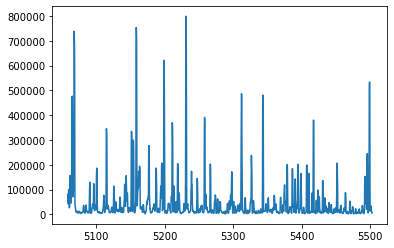

In [35]:
plt.clf()
ax = plt.gca()
ax.plot(wv3, hdul_o1D[3].data)
#
plt.show()

In [42]:
wv3[0:5]

array([5058.  , 5058.25, 5058.5 , 5058.75, 5059.  ])

## Matches VLT User Manual! :) 

----

# What is the VIS reid_arxiv file format?

## Load

### PypeIt

In [6]:
reid_file = os.path.join(
    resource_filename('pypeit', 'data'), 
    'arc_lines', 'reid_arxiv', 
    'vlt_xshooter_vis1x1.fits')

In [9]:
templ_dict, par = waveio.load_reid_arxiv(reid_file)

In [10]:
templ_dict.keys()

odict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14'])

In [12]:
templ_dict['0'].keys()

dict_keys(['spec', 'wave_soln', 'order'])

In [20]:
templ_dict['0']['order']

30

In [19]:
par

### FITS

In [14]:
hdul_t = fits.open(reid_file)
hdul_t.info()

Filename: /home/xavier/Projects/PypeIt-codes/PypeIt/pypeit/data/arc_lines/reid_arxiv/vlt_xshooter_vis1x1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     15   15R x 3C   [4000D, 4000D, K]   


In [16]:
tmpl_tbl = Table.read(reid_file)

In [17]:
tmpl_tbl

wave [4000],flux [4000],order
float64,float64,int64
5175.9326896940065 .. 5613.532585228901,0.0 .. 1.5,30
5354.435797488019 .. 5806.01424841586,0.0 .. 52.0,29
5549.965351670998 .. 6012.012610685711,0.0 .. 8.0,28
5755.843691081425 .. 6233.528365542485,0.0 .. 0.0,27
5977.681215565389 .. 6472.0457614894385,-3.5 .. 3.0,26
...,...,...
7402.225952960051 .. 8004.716288865693,-0.5 .. 43.0,21
7771.956089311371 .. 8403.396277405653,-2.0 .. 34.5,20
8181.0384070823475 .. 8844.080872837525,23.0 .. 99.5,19


----

# UVB : Build an order

----

In [21]:
np.arange(24, 13, -1, dtype=int)

array([24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14])

## arccen

In [22]:
arccen = np.load('vlt_xshooter_uvb_arccen.npy')
arccen.shape

(3000, 11)

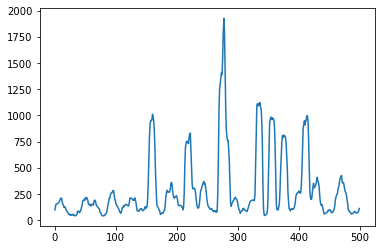

In [62]:
plt.clf()
ax = plt.gca()
ax.plot(arccen[:,0][1500:2000])
#
plt.show()

In [39]:
idx_o = 30 # Order 23

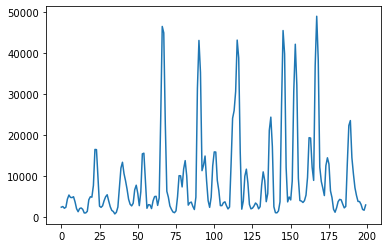

In [61]:
plt.clf()
ax = plt.gca()
ax.plot(hdul_o1D[idx_o].data[400:600])
#
plt.show()


## Red

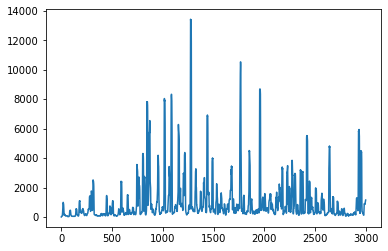

In [51]:
plt.clf()
ax = plt.gca()
ax.plot(arccen[:,-2])
#
plt.show()


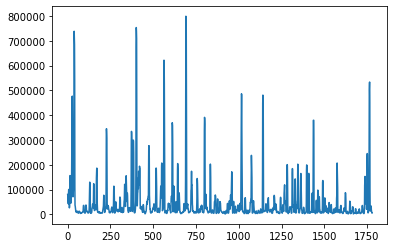

In [50]:
plt.clf()
ax = plt.gca()
ax.plot(hdul_o1D[3].data)
plt.show()


In [58]:
orders = np.arange(23, 12, -1, dtype=int)
orders

array([23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13])

In [59]:
orders.size

11

In [56]:
forders = np.array([0.32671887, 0.39553878, 0.45989826, 0.52009878, 0.5764598,
            0.62917188, 0.67859507, 0.72482729, 0.76815531, 0.80879042,
            0.84700373])

In [57]:
forders.size

11